# Support Vector Machines
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

**The advantages of support vector machines are:**

- Effective in high dimensional spaces.  
- Still effective in cases where number of dimensions is greater than the number of samples.  
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.  

*Versatile*: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**The disadvantages of support vector machines include:**

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation


In [1]:
import numpy as np

# global variable
global img_number
img_number = 550

output_filename = 'digit_fv.train'
digit_data = np.loadtxt(output_filename, dtype='float64')

print("Size of the feature vector", digit_data.shape)
print digit_data[0:10,0:]

('Size of the feature vector', (978, 785))
[[ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]]


In [3]:
import math
from skimage import io

# show image
def vec2img(vec):
    
    img_row = int(math.sqrt(vec.shape[0]))
    img_col = img_row
    img = vec.reshape((img_row, img_col))
    
    io.imshow(img)
    io.show()
    
# check predict
def chkpredict(actual_class, predict_class):
    if(actual_class==predict_class):
        print("(Correct prediction)")
    else:
        print("(Incorrect prediction)")

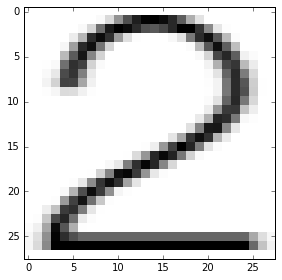

In [4]:
# show image
vec2img(digit_data[img_number,1:])

In [6]:
from sklearn import svm

X = digit_data[:,1:]
y = digit_data[:,0]

# create SVM model
clf_svm = svm.SVC()
clf_svm.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
print("Training set score: %f" % clf_svm.score(X, y))

Training set score: 1.000000


In [10]:
# Prediction

print("Actual", y[img_number])
predict_class = clf_svm.predict([X[img_number,:]])
print("Predict", predict_class)
chkpredict(y[img_number], predict_class)

('Actual', 2.0)
('Predict', array([ 2.]))
(Correct prediction)


## RBF SVM parameters
This example illustrates the effect of the parameters ```gamma``` and ```C``` of the Radial Basis Function (RBF) kernel SVM.  

Intuitively, the ```gamma``` parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The ```gamma``` parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The ```C``` parameter trades off misclassification of training examples against simplicity of the decision surface. A low ```C``` makes the decision surface smooth, while a high ```C``` aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.  

useful link: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
            
# It is usually a good idea to scale the data for SVM training.
scaler = StandardScaler()
X = scaler.fit_transform(X)


# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(2, 10, 2)
gamma_range = np.logspace(-9, 3, 2)
param_grid = dict(gamma=gamma_range, C=C_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
report(grid.cv_results_)

The best parameters are {'C': 10000000000.0, 'gamma': 1.0000000000000001e-09} with a score of 1.00
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'C': 10000000000.0, 'gamma': 1.0000000000000001e-09}

Model with rank: 2
Mean validation score: 0.996 (std: 0.004)
Parameters: {'C': 100.0, 'gamma': 1000.0}

Model with rank: 2
Mean validation score: 0.996 (std: 0.004)
Parameters: {'C': 10000000000.0, 'gamma': 1000.0}



In [15]:
C_range = np.logspace(-2, 10, 2)
gamma_range = np.logspace(-9, 3, 2)

print C_range
print gamma_range

[  1.00000000e-02   1.00000000e+10]
[  1.00000000e-09   1.00000000e+03]


## linear kernel 

In [31]:
C_range = np.logspace(2, 10, 5)
param_grid = dict(C=C_range, kernel=['linear'])

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
report(grid.cv_results_)

The best parameters are {'kernel': 'linear', 'C': 100.0} with a score of 1.00
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'kernel': 'linear', 'C': 100.0}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'kernel': 'linear', 'C': 10000.0}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'kernel': 'linear', 'C': 1000000.0}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'kernel': 'linear', 'C': 100000000.0}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'kernel': 'linear', 'C': 10000000000.0}

